In [1]:
%%html
<marquee style='width: 90%; color: blue;'><b>INSTITUTO INFNET | ESCOLA SUPERIOR DA
TECNOLOGIA DA INFORMAÇÃO</b></marquee>

![logo_infnet.png](https://www.infnet.edu.br/infnet/wp-content/uploads/sites/6/2021/10/infnet_mod.svg)

<h2>Pós-graduação MIT em Inteligência Artificial, Machine Learning & Deep Learning</h2>

<h3>Projeto da disciplina de Deep Learning com TensorFlow.</h3>

Bloco: Redes neurais com TensorFlow

Docente: Diego da Silva Rodrigues

Aluno: Winicius Botelho Faquieri 

---

In [57]:
# Libs:

# !pip install boruta
# !pip install keras
# !pip install tensorflow
# !pip install pyreadr
import pandas as pd
import numpy as np
import seaborn as sns
import math
import inflection
from matplotlib import pyplot as plt
from IPython.core.display import HTML
from sklearn import model_selection as ms
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from keras.models import Sequential 
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy

## TABLE OF CONTENTS
* [1. Entendendo o Problema de Negócio](#label1)

* [2. A descrição dos dados](##label2)

    * [1.1 Data dimensions](#datadim)
    
    * [1.2 Data types](#datatyp)
    
    * [1.3 Check NA](#checkna)
    
    * [Fillout NA](#filloutna)
    
    * [Change data types](#changetypes)
    
    * [Descriptive statistics](#descrstats)
    
    * [Numerical atributes](#numstats)
    
    * [Categorical atributes](#categ_atrib)     
    
* [3. Feature Engineering](#label3)

* [4. Análise Exploratória dos Dados](#label4)

* [5. Preparação dos Dados](#label5)

* [6. Feature Selection](#label6)

* [7. Modelo de Machine Learning](#)

* [8. Hyperparameter Fine Tuning](#)

* [9. Interpretação e Tradução do Erro](#)

* [10. Deploy do Modelo em Produção](#)

* [References](#)


## 0. Business understanding<a class="anchor" id="dataset_info"></a>

Problema: classificar uma base de transações de produtos em 03 segmentos, a saber:

* Segmento I - Supermercados com 5 ou mais checkouts

* Segmento II - Supermercados com 4 ou menos checkouts (mercadinhos, mercearias, etc)

* Segmento III - Bares, restaurantes, padarias

### CRISP-DM

- Método cíclico de desenvolvimento do projeto de DS.

- 1º ciclo CRISP completo.
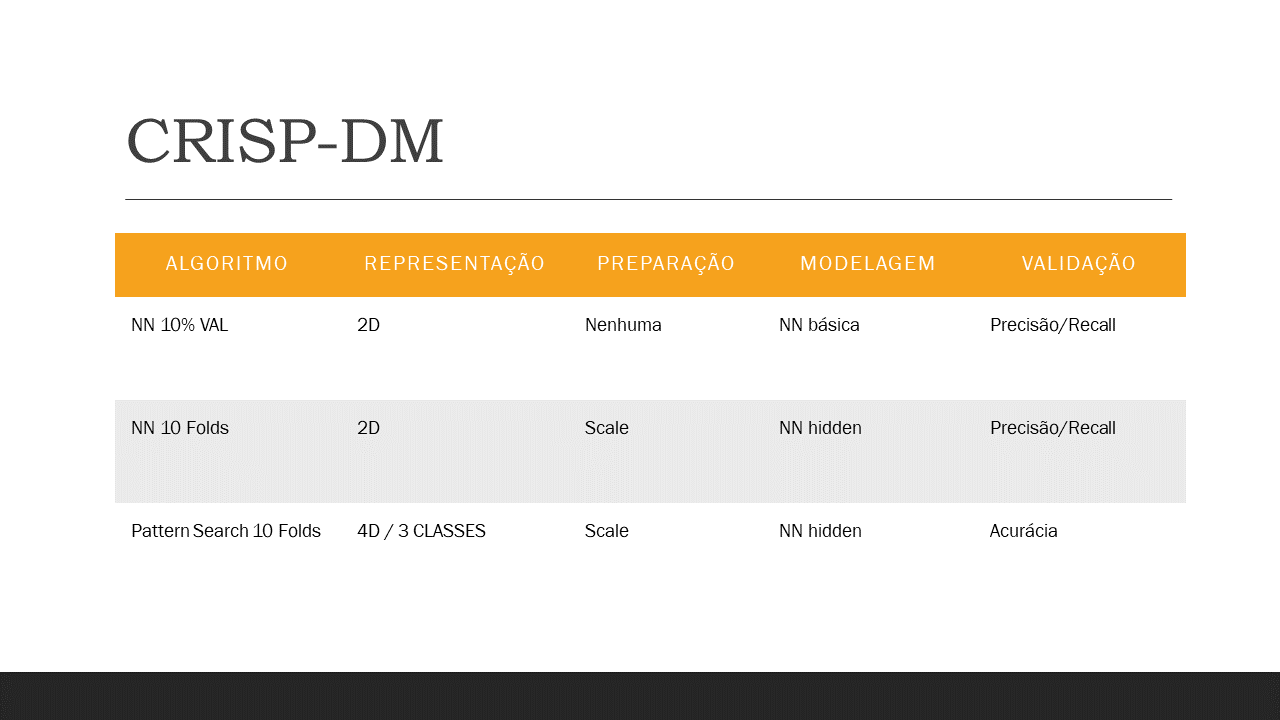



## 1. A Descrição dos Dados <a class="anchor" id="dataset_info"></a>

In [3]:
df = pd.read_csv('../data/dados.csv', dtype=str)

In [5]:
df.head()

,DAT_EMISSAO,NUM_DOC_DEST,PRODUTO,NUM_QTD_COMPRA,VAL_UN_COMPRA,VAL_BRUTO,SEGMENTO
0,2019-04-30,23614948000132,CERV SKOL 300 GARRAFA DE VIDRO RETORNAVEL,10,35.45,354.5,I
1,2019-11-16,29912303000162,KUAT 250 GARRAFA PET DESCARTAVEL,360,0.66,237.6,II
2,2019-01-29,00226450000105,FANTA 2000 GARRAFA PET RETORNAVEL,180,3.11,559.8,II
3,2019-01-22,23950410000107,CERV BRAHMA 473 GARRAFA PET DESCARTAVEL,10,21.29,212.9,I
4,2019-04-16,24327850000167,CERV BRAHMA 473 GARRAFA PET DESCARTAVEL,50,34,1700,I


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533203 entries, 0 to 533202
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   DAT_EMISSAO     533203 non-null  object
 1   NUM_DOC_DEST    533203 non-null  object
 2   PRODUTO         533203 non-null  object
 3   NUM_QTD_COMPRA  533203 non-null  object
 4   VAL_UN_COMPRA   533203 non-null  object
 5   VAL_BRUTO       533203 non-null  object
 6   SEGMENTO        533203 non-null  object
dtypes: object(7)
memory usage: 28.5+ MB


### 1.1 Data Dimensions <a class="anchor" id="datadim"></a>

In [9]:
print( 'Number of Rows: {}'.format( df.shape[0] ) )
print( 'Number of Cols: {}'.format( df.shape[1] ) )

Number of Rows: 533203
Number of Cols: 7


### 1.2 Data Types <a class="anchor" id="datatyp"></a>

In [10]:
df['DAT_EMISSAO'] = pd.to_datetime( df['DAT_EMISSAO'] )
df.dtypes

DAT_EMISSAO       datetime64[ns]
NUM_DOC_DEST              object
PRODUTO                   object
NUM_QTD_COMPRA            object
VAL_UN_COMPRA             object
VAL_BRUTO                 object
SEGMENTO                  object
dtype: object

### 1.3 Check NA<a class="anchor" id="checkna"></a>

In [11]:
df.isna().sum()

DAT_EMISSAO       0
NUM_DOC_DEST      0
PRODUTO           0
NUM_QTD_COMPRA    0
VAL_UN_COMPRA     0
VAL_BRUTO         0
SEGMENTO          0
dtype: int64

### 1.4 Change data types <a class="anchor" id="changetypes"></a>

In [16]:
# NUM_QTD_COMPRA: QUANTIDADE ADQUIRIDA DE DETERMINADO PRODUTO
df['NUM_QTD_COMPRA'] = df['NUM_QTD_COMPRA'].astype( int )

# VAL_UN_COMPRA: VALOR UNITÁRIO PAGO PELA COMPRA
df['VAL_UN_COMPRA'] = df['VAL_UN_COMPRA'].astype( float )
df['VAL_UN_COMPRA'] = df['VAL_UN_COMPRA'].round(decimals = 2)

# VAL_BRUTO: VAL_UN_COMPRA X NUM_QTD_COMPRA
df['VAL_BRUTO'] = df['VAL_BRUTO'].astype( float )
df['VAL_BRUTO'] = df['VAL_BRUTO'].round(decimals = 2)

df.dtypes

DAT_EMISSAO       datetime64[ns]
NUM_DOC_DEST              object
PRODUTO                   object
NUM_QTD_COMPRA             int32
VAL_UN_COMPRA            float64
VAL_BRUTO                float64
SEGMENTO                  object
dtype: object

### 1.5 Descriptive statistics <a class="anchor" id="descrstats"></a>

In [17]:
num_attributes = df.select_dtypes( include=['int32', 'float64'] )
cat_attributes = df.select_dtypes( exclude=['int32', 'float64','datetime64[ns]'] )

### 1.6 Numerical atributes <a class="anchor" id="numstats"></a>

In [18]:
# Central Tendency - mean, meadina
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std','skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,NUM_QTD_COMPRA,5.0,294000.00,293995.00,326.225818,120.00,2125.389941,47.195703,3696.788225
1,VAL_UN_COMPRA,0.0,459.33,459.33,13.478498,4.74,20.514488,6.019013,87.108958
2,VAL_BRUTO,0.0,1207920.00,1207920.00,1940.734837,358.60,12907.780865,35.166808,1984.614039


In [21]:
# Excluindo valores unitários iguais a zero:
df = df[df['VAL_UN_COMPRA']!=0]

# Verificando o número de lihas 
print( 'Number of Rows: {}'.format( df.shape[0] ) )

Number of Rows: 533202


In [22]:
num_attributes = df.select_dtypes( include=['int32', 'float64'] )
cat_attributes = df.select_dtypes( exclude=['int32', 'float64','datetime64[ns]'] )

# Central Tendency - mean, meadina
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std','skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,NUM_QTD_COMPRA,5.00,294000.00,293995.00,326.225417,120.00,2125.391914,47.195661,3696.781462
1,VAL_UN_COMPRA,0.04,459.33,459.29,13.478524,4.74,20.514499,6.019012,87.108905
2,VAL_BRUTO,0.40,1207920.00,1207919.60,1940.738477,358.60,12907.792696,35.166776,1984.610441


<AxesSubplot:xlabel='VAL_UN_COMPRA'>

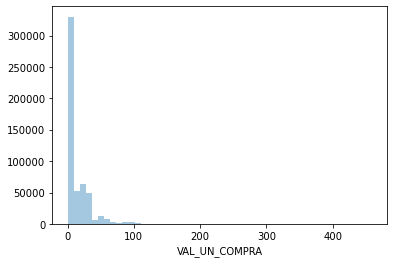

In [24]:
sns.distplot( df['VAL_UN_COMPRA'], kde=False )

### 1.7 Categorical Atributes

In [29]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

NUM_DOC_DEST    8768
PRODUTO          311
SEGMENTO           4
dtype: int64

<AxesSubplot:xlabel='SEGMENTO', ylabel='VAL_UN_COMPRA'>

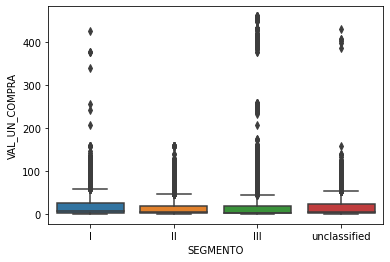

In [35]:
plt.subplot( 1, 1, 1 )
sns.boxplot( x='SEGMENTO', y='VAL_UN_COMPRA', data=df )

### FEATURE ENGINEERING <a class="anchor" id="hipotes"></a>

- Canais de distribuição:

Segmento I - Supermercados com 5 ou mais checkouts

Segmento II - Supermercados com 4 ou menos checkouts (mercadinhos, mercearias, etc)

Segmento III - Bares, restaurantes, padarias, etc.

**Hipóteses**:

- H1: VALOR UNITÁRIO DA COMPRA: É esperado um valor unitário da compra maior de empresas no segmento 3 do que nos segmentos 1 e 2? 



- H2. QUANTIDADE COMPRADA: É esperado um volume médio de compras maior por empresas do segmento 1 do que de outros segmentos?



- H3. CESTA DE PRODUTOS DIFERENTES: é esperado um mix de produtos maior no segmento 1 do que nos segmentos 2 e 3? 



- H4. COMPRAS EFETUADAS: É esperado um número de compras realizadas maior no segmento 1 do que em outros segmentos?



- H5. FATURAMENTO BRUTO: Empresas do segmento 1 possuem um faturamento bruto médio anual maior do que em outros segmentos?

...


In [2]:
features = pd.read_csv('../data/features.csv', dtype=str)

In [3]:
features.head()

,DAT_EMISSAO,NUM_DOC_DEST,PRODUTO,NUM_QTD_COMPRA,VAL_UN_COMPRA,VAL_BRUTO,N_COMPRAS,VAL_UNIT_MEDIO,VOLUME_COMPRA_MEDIO,VAL_BRUTO_MEDIO,CESTA_PROD_DIFER_1,CESTA_PROD_DIFER_2,SEGMENTO
0,2019-05-24,13004510014481,CERV SKOL 350 LATA DESCARTAVEL,40,22.2,888,1674,21.315549581839907,328.3333333333333,6998.605446037435,137,0.08183990442054959,I
1,2019-06-27,13004510014481,CERV HEINEKEN 330 GARRAFA DE VIDRO DESCARTAVEL,270,87.12,23522.4,1674,21.315549581839907,328.3333333333333,6998.605446037435,137,0.08183990442054959,I
2,2019-05-24,13004510014481,REFRI SUKITA 2000 GARRAFA PET DESCARTAVEL,10,16.8,168,1674,21.315549581839907,328.3333333333333,6998.605446037435,137,0.08183990442054959,I
3,2019-02-02,13004510014481,REFRI INDAIA 250 GARRAFA PET DESCARTAVEL,40,9.62,384.8,1674,21.315549581839907,328.3333333333333,6998.605446037435,137,0.08183990442054959,I
4,2019-03-21,13004510014481,FANTA 250 GARRAFA PET DESCARTAVEL,960,1.06,1017.6,1674,21.315549581839907,328.3333333333333,6998.605446037435,137,0.08183990442054959,I


In [4]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533202 entries, 0 to 533201
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DAT_EMISSAO          533202 non-null  object
 1   NUM_DOC_DEST         533202 non-null  object
 2   PRODUTO              533202 non-null  object
 3   NUM_QTD_COMPRA       533202 non-null  object
 4   VAL_UN_COMPRA        533202 non-null  object
 5   VAL_BRUTO            533202 non-null  object
 6   N_COMPRAS            533202 non-null  object
 7   VAL_UNIT_MEDIO       533202 non-null  object
 8   VOLUME_COMPRA_MEDIO  533202 non-null  object
 9   VAL_BRUTO_MEDIO      533202 non-null  object
 10  CESTA_PROD_DIFER_1   533202 non-null  object
 11  CESTA_PROD_DIFER_2   533202 non-null  object
 12  SEGMENTO             533202 non-null  object
dtypes: object(13)
memory usage: 52.9+ MB


In [ ]:
print( 'Number of Rows: {}'.format( features.shape[0] ) )
print( 'Number of Cols: {}'.format( features.shape[1] ) )

In [42]:
features.isna().sum()

DAT_EMISSAO            0
NUM_DOC_DEST           0
PRODUTO                0
NUM_QTD_COMPRA         0
VAL_UN_COMPRA          0
VAL_BRUTO              0
N_COMPRAS              0
VAL_UNIT_MEDIO         0
VOLUME_COMPRA_MEDIO    0
VAL_BRUTO_MEDIO        0
CESTA_PROD_DIFER_1     0
CESTA_PROD_DIFER_2     0
SEGMENTO               0
dtype: int64

In [4]:
# NUM_QTD_COMPRA: QUANTIDADE ADQUIRIDA DE DETERMINADO PRODUTO
features['NUM_QTD_COMPRA'] = features['NUM_QTD_COMPRA'].astype( int )

# VAL_UN_COMPRA: VALOR UNITÁRIO PAGO PELA COMPRA
features['VAL_UN_COMPRA'] = features['VAL_UN_COMPRA'].astype( float )
features['VAL_UN_COMPRA'] = features['VAL_UN_COMPRA'].round(decimals = 2)

# VAL_BRUTO: VAL_UN_COMPRA X NUM_QTD_COMPRA
features['VAL_BRUTO'] = features['VAL_BRUTO'].astype( float )
features['VAL_BRUTO'] = features['VAL_BRUTO'].round(decimals = 2)

# N_COMPRAS: NÚMERO DE OBSERVAÇÕES. CADA LINHA REPRESENTA UMA COMPRA REALIZADA POR DETERMINADA EMPRESA
features['N_COMPRAS'] = features['N_COMPRAS'].astype( int )

# VAL_UNIT_MEDIO: VALOR MÉDIO PAGO POR CADA PRODUTO. SE UMA EMPRESA COMPROU 03 PRODUTOS AOS PREÇOS R$1, R$2 e R$3, então o valor médio para foi R$ 2.
features['VAL_UNIT_MEDIO'] = features['VAL_UNIT_MEDIO'].astype( float )

# VOLUME_COMPRA_MEDIO: MÉDIA DO VOLUME DE COMPRA
features['VOLUME_COMPRA_MEDIO'] = features['VOLUME_COMPRA_MEDIO'].astype( float )

# VAL_BRUTO_MEDIO: VAL_UNIT_MEDIO * VOLUME_COMPRA_MEDIO
features['VAL_BRUTO_MEDIO'] = features['VAL_BRUTO_MEDIO'].astype( float )

# CESTA_PROD_DIFER_1: QUANTIDADE DE PRODUTOS DIFERENTES NA CESTA DE UM DADO ESTABELECIMENTO
features['CESTA_PROD_DIFER_1'] = features['CESTA_PROD_DIFER_1'].astype( int )

# CESTA_PROD_DIFER_2: QUANTIDADE DE PRODUTOS DIFERENTES, CORRIGIDO PELA N° DE COMPRAS 
features['CESTA_PROD_DIFER_2'] = features['CESTA_PROD_DIFER_2'].astype( float )

features.dtypes

DAT_EMISSAO             object
NUM_DOC_DEST            object
PRODUTO                 object
NUM_QTD_COMPRA           int32
VAL_UN_COMPRA          float64
VAL_BRUTO              float64
N_COMPRAS                int32
VAL_UNIT_MEDIO         float64
VOLUME_COMPRA_MEDIO    float64
VAL_BRUTO_MEDIO        float64
CESTA_PROD_DIFER_1       int32
CESTA_PROD_DIFER_2     float64
SEGMENTO                object
dtype: object

In [47]:
num_attributes = features.select_dtypes( include=['int32', 'float64'] )
cat_attributes = features.select_dtypes( exclude=['int32', 'float64','datetime64[ns]'] )

# Central Tendency - mean, meadina
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std','skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,NUM_QTD_COMPRA,5.000000,294000.000,2.939950e+05,326.225417,120.000000,2125.391914,47.195661,3696.781462
1,VAL_UN_COMPRA,0.040000,459.330,4.592900e+02,13.478524,4.740000,20.514499,6.019012,87.108905
2,VAL_BRUTO,0.400000,1207920.000,1.207920e+06,1940.738477,358.600000,12907.792696,35.166776,1984.610441
3,N_COMPRAS,1.000000,1674.000,1.673000e+03,268.127243,170.000000,289.400600,2.208819,5.814232
4,VAL_UNIT_MEDIO,0.570000,407.295,4.067250e+02,13.478524,11.188750,11.005896,2.351248,21.584774
5,VOLUME_COMPRA_MEDIO,10.000000,44825.000,4.481500e+04,326.225417,160.072816,793.945966,13.675391,385.556121
6,VAL_BRUTO_MEDIO,27.300000,599758.500,5.997312e+05,4024.034072,1451.891534,11490.199952,14.399403,387.065874
7,CESTA_PROD_DIFER_1,1.000000,143.000,1.420000e+02,48.348993,38.000000,35.260810,0.862602,-0.176374
8,CESTA_PROD_DIFER_2,0.007634,1.000,9.923664e-01,0.258795,0.224490,0.147154,2.160297,6.587130


Utilizaremos os 06 recursos destacados para classificar nossos dados em canais de distribuição ou segmentos I, II ou III:

- Segmento I - Supermercados com 5 ou mais checkouts

- Segmento II - Supermercados com 4 ou menos checkouts (mercadinhos, mercearias, etc)

- Segmento III - Bares, restaurantes, padarias, etc.




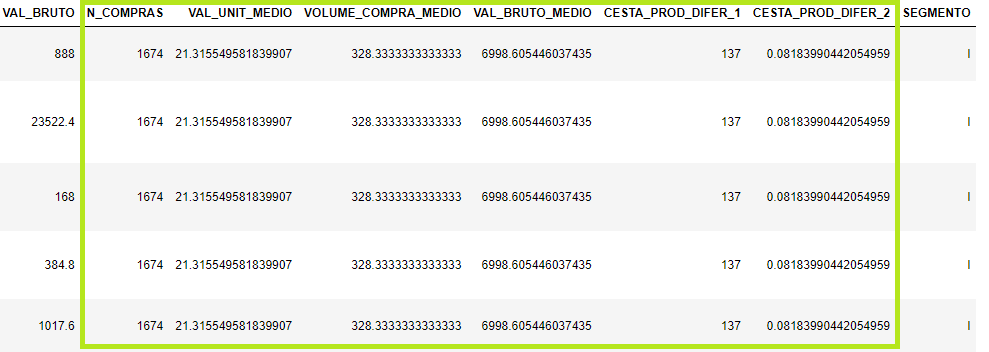

In [5]:
# Desse modo, vamos descartar algumas colunas que não precisamos

features1 = features.drop(['DAT_EMISSAO', 'PRODUTO','NUM_QTD_COMPRA', 'VAL_UN_COMPRA', 'VAL_BRUTO'], axis=1) 
features1.head()


,NUM_DOC_DEST,N_COMPRAS,VAL_UNIT_MEDIO,VOLUME_COMPRA_MEDIO,VAL_BRUTO_MEDIO,CESTA_PROD_DIFER_1,CESTA_PROD_DIFER_2,SEGMENTO
0,13004510014481,1674,21.31555,328.333333,6998.605446,137,0.08184,I
1,13004510014481,1674,21.31555,328.333333,6998.605446,137,0.08184,I
2,13004510014481,1674,21.31555,328.333333,6998.605446,137,0.08184,I
3,13004510014481,1674,21.31555,328.333333,6998.605446,137,0.08184,I
4,13004510014481,1674,21.31555,328.333333,6998.605446,137,0.08184,I


In [7]:
# Exportando...
features1.to_pickle('../data/features1.pickle')

### ANÁLISE EXPLORATÓRIA DE DADOS <a class="anchor" id="prep"></a>

Objetivos:

- Validar hipóteses (insights)

- Perceber variáveis que são importantes para o modelo

### Distribuição da variável target

> Cerca de 2% da coluna SEGMENTO não estão classificados em I, II ou III. Nosso problema consiste em classificar esses dados.

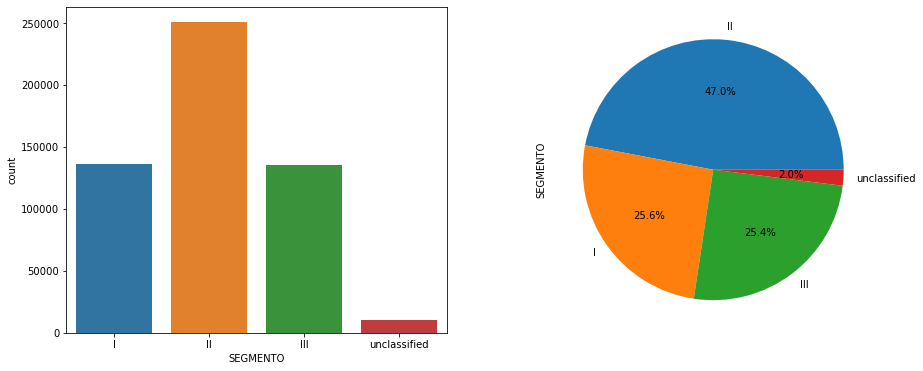

In [7]:
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x='SEGMENTO', data=features1, ax=ax[0])
_ = features1['SEGMENTO'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

In [16]:
num_attributes = features1.select_dtypes( include=['int32', 'float64'] )
num_attributes

,N_COMPRAS,VAL_UNIT_MEDIO,VOLUME_COMPRA_MEDIO,VAL_BRUTO_MEDIO,CESTA_PROD_DIFER_1,CESTA_PROD_DIFER_2
0,1674,21.31555,328.333333,6998.605446,137,0.08184
1,1674,21.31555,328.333333,6998.605446,137,0.08184
2,1674,21.31555,328.333333,6998.605446,137,0.08184
3,1674,21.31555,328.333333,6998.605446,137,0.08184
4,1674,21.31555,328.333333,6998.605446,137,0.08184
...,...,...,...,...,...,...
533197,1,7.39000,300.000000,2217.000000,1,1.00000
533198,1,9.00000,200.000000,1800.000000,1,1.00000
533199,1,1.33000,60.000000,79.800000,1,1.00000
533200,1,33.54000,10.000000,335.400000,1,1.00000


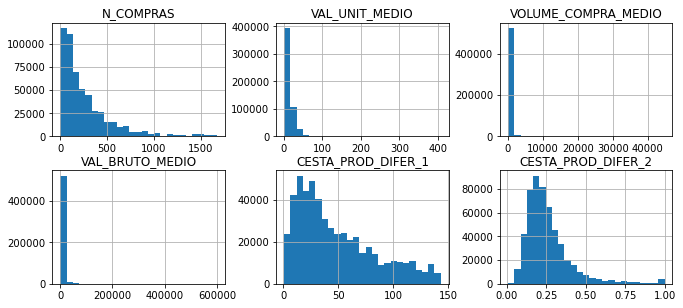

In [42]:
plt.rcParams["figure.figsize"] = (800/72., 4.8)
num_attributes.hist( bins=25, layout=(2,3) );

In [ ]:
# a density plot to investigate the relationship between each variable and the target variable:

# create a subplot of 3 x 3
plt.subplots(3,3,figsize=(15,15))

# Plot a density plot for each variable
for idx, col in enumerate(features1.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(features1.loc[features1.SEGMENTO == 'I'][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'-',  
    'color':'black', 'label':"Segmento 1"})
    sns.distplot(features1.loc[features1.SEGMENTO == 'II'][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'--', 
    'color':'black', 'label':"Segmento 1"})
    ax.set_title(col)

# Hide the 9th subplot (bottom right) since there are only 8 plots
plt.subplot(3,3,9).set_visible(False)

plt.show()

 - Análise bivariada:
 
 H1: É esperado um valor unitário da compra maior de empresas no segmento 3 do que nos segmentos 1 e 2? Por outras palavras, empresas nesse canal de distribuição (bares e restaurantes) pagam um preço unitário médio maior do que nos outros segmentos?
 
 

<AxesSubplot:xlabel='VAL_UNIT_MEDIO', ylabel='Density'>

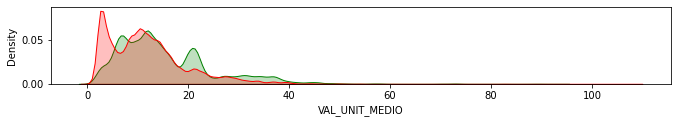

In [83]:
plt.rcParams["figure.figsize"] = (800/72., 4.8)
plt.subplot( 3, 1, 1 )
sns.kdeplot( features1[features1['SEGMENTO'] == 'I']['VAL_UNIT_MEDIO'], label='SEGMENTO I', shade=True, color = 'green')
sns.kdeplot( features1[features1['SEGMENTO'] == 'II']['VAL_UNIT_MEDIO'], label='SEGMENTO II', shade=True, color = 'red' )

<AxesSubplot:xlabel='VAL_UNIT_MEDIO', ylabel='Density'>

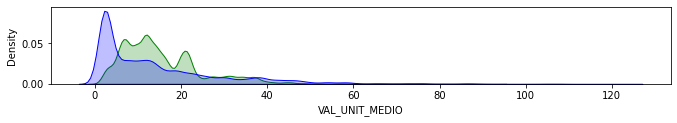

In [76]:
plt.subplot( 3, 1, 1 )
sns.kdeplot( features1[features1['SEGMENTO'] == 'I']['VAL_UNIT_MEDIO'], label='SEGMENTO I', shade=True, color = 'green' )
sns.kdeplot( features1[features1['SEGMENTO'] == 'III']['VAL_UNIT_MEDIO'], label='SEGMENTO III', shade=True , color = 'blue')

<AxesSubplot:xlabel='VAL_UNIT_MEDIO', ylabel='Density'>

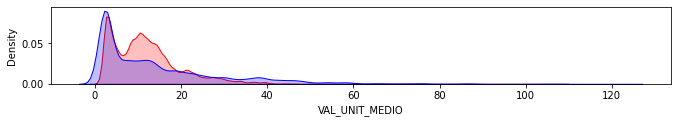

In [84]:
plt.subplot( 3, 1, 1 )
sns.kdeplot( VAL_UNIT_MEDIO[features1['SEGMENTO'] == 'II']['VAL_UNIT_MEDIO'], label='SEGMENTO II', shade=True, color = 'red' )
sns.kdeplot( features1[features1['SEGMENTO'] == 'III']['VAL_UNIT_MEDIO'], label='SEGMENTO III', shade=True, color = 'blue' )

### DATA PREPARATION <a class="anchor" id="prep"></a>

> O aprendizado da maioria dos algoritmos de ML é facilitado por dados numéricos, na mesma escala.

- Normalização: reescala o centro para zero com desvio-padrao igual a 1.


- Rescaling: reescala para o intervalo 0 e 1 (distribuições não Gaussianas):


    - Min-Max Scaler: utiliza o range
    - Robust Scaler: utiliza o IQR


- Transformação: conversão da feature categórica para numérica - encoding - e de natureza.

In [89]:
num_attributes = features1.select_dtypes( include=['int32', 'float64'] )

# Central Tendency - mean, meadina
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std','skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,N_COMPRAS,1.000000,1674.000,1673.000000,268.127243,170.000000,289.400600,2.208819,5.814232
1,VAL_UNIT_MEDIO,0.570000,407.295,406.725000,13.478524,11.188750,11.005896,2.351248,21.584774
2,VOLUME_COMPRA_MEDIO,10.000000,44825.000,44815.000000,326.225417,160.072816,793.945966,13.675391,385.556121
3,VAL_BRUTO_MEDIO,27.300000,599758.500,599731.200000,4024.034072,1451.891534,11490.199952,14.399403,387.065874
4,CESTA_PROD_DIFER_1,1.000000,143.000,142.000000,48.348993,38.000000,35.260810,0.862602,-0.176374
5,CESTA_PROD_DIFER_2,0.007634,1.000,0.992366,0.258795,0.224490,0.147154,2.160297,6.587130


<AxesSubplot:xlabel='SEGMENTO', ylabel='N_COMPRAS'>

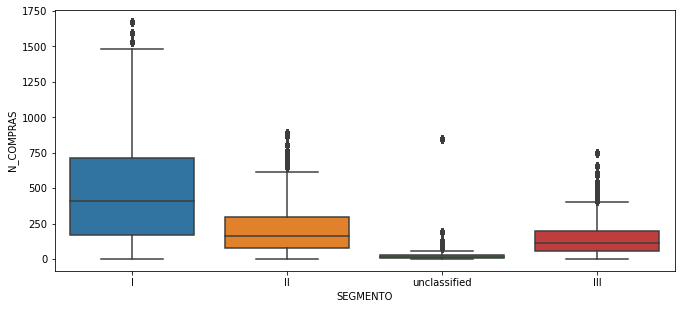

In [97]:
sns.boxplot( x='SEGMENTO', y='N_COMPRAS', data=features1 )

<AxesSubplot:xlabel='SEGMENTO', ylabel='VAL_UNIT_MEDIO'>

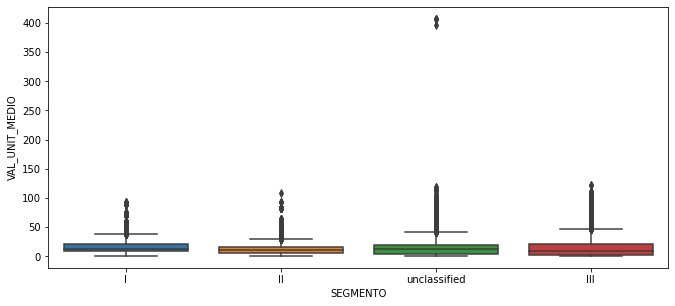

In [91]:
sns.boxplot( x='SEGMENTO', y='VAL_UNIT_MEDIO', data=features1 )

<AxesSubplot:xlabel='SEGMENTO', ylabel='VOLUME_COMPRA_MEDIO'>

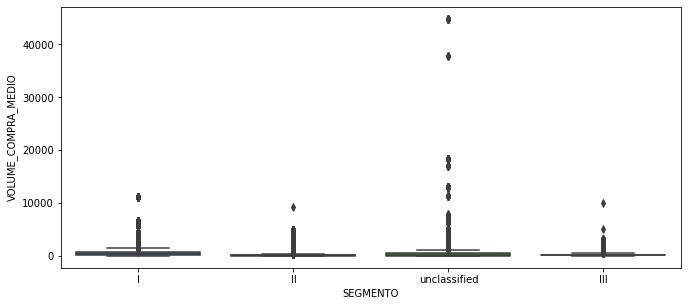

In [92]:
sns.boxplot( x='SEGMENTO', y='VOLUME_COMPRA_MEDIO', data=features1 )

<AxesSubplot:xlabel='SEGMENTO', ylabel='VAL_BRUTO_MEDIO'>

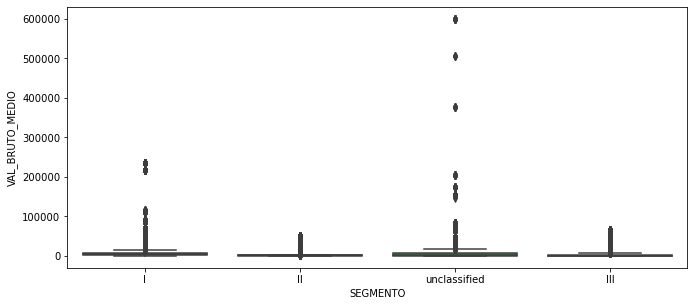

In [98]:
sns.boxplot( x='SEGMENTO', y='VAL_BRUTO_MEDIO', data=features1 )

<AxesSubplot:xlabel='SEGMENTO', ylabel='CESTA_PROD_DIFER_1'>

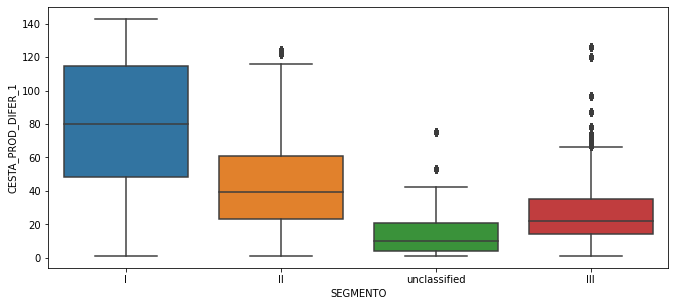

In [99]:
sns.boxplot( x='SEGMENTO', y='CESTA_PROD_DIFER_1', data=features1 )

<AxesSubplot:xlabel='SEGMENTO', ylabel='CESTA_PROD_DIFER_2'>

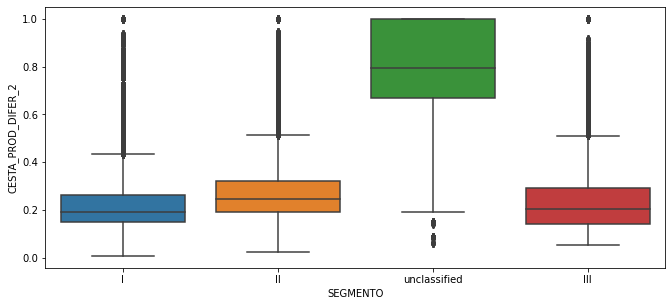

In [100]:
sns.boxplot( x='SEGMENTO', y='CESTA_PROD_DIFER_2', data=features1 )

### Rescaling: Robust Scaler (RS)

Vamos utilizar o método RS devido a presença de valores atípicos. Isso ocorre, principalmente, devido a diversidade de produtos no dataset. Qualquer produto transacionado nesses diferentes segmentos foram considerados.

In [8]:
features2 = features1.copy()
rs = RobustScaler()

# competition distance
features2['N_COMPRAS'] = rs.fit_transform( features2[['N_COMPRAS']].values )
features2['VAL_UNIT_MEDIO'] = rs.fit_transform( features2[['VAL_UNIT_MEDIO']].values )
features2['VOLUME_COMPRA_MEDIO'] = rs.fit_transform( features2[['VOLUME_COMPRA_MEDIO']].values )
features2['VAL_BRUTO_MEDIO'] = rs.fit_transform( features2[['VAL_BRUTO_MEDIO']].values )
features2['CESTA_PROD_DIFER_1'] = rs.fit_transform( features2[['CESTA_PROD_DIFER_1']].values )
features2['CESTA_PROD_DIFER_2'] = rs.fit_transform( features2[['CESTA_PROD_DIFER_2']].values )

In [10]:
# Exportando...
features2.to_pickle('../data/features2.pickle')

In [125]:
# after rescaling
features2.head()

,NUM_DOC_DEST,N_COMPRAS,VAL_UNIT_MEDIO,VOLUME_COMPRA_MEDIO,VAL_BRUTO_MEDIO,CESTA_PROD_DIFER_1,CESTA_PROD_DIFER_2,SEGMENTO
0,13004510014481,5.449275,0.837084,0.900393,2.051007,1.98,-0.995403,I
1,13004510014481,5.449275,0.837084,0.900393,2.051007,1.98,-0.995403,I
2,13004510014481,5.449275,0.837084,0.900393,2.051007,1.98,-0.995403,I
3,13004510014481,5.449275,0.837084,0.900393,2.051007,1.98,-0.995403,I
4,13004510014481,5.449275,0.837084,0.900393,2.051007,1.98,-0.995403,I


In [106]:
# before
features1.head()

,NUM_DOC_DEST,N_COMPRAS,VAL_UNIT_MEDIO,VOLUME_COMPRA_MEDIO,VAL_BRUTO_MEDIO,CESTA_PROD_DIFER_1,CESTA_PROD_DIFER_2,SEGMENTO
0,13004510014481,1674,21.31555,328.333333,6998.605446,137,0.08184,I
1,13004510014481,1674,21.31555,328.333333,6998.605446,137,0.08184,I
2,13004510014481,1674,21.31555,328.333333,6998.605446,137,0.08184,I
3,13004510014481,1674,21.31555,328.333333,6998.605446,137,0.08184,I
4,13004510014481,1674,21.31555,328.333333,6998.605446,137,0.08184,I


C:\Users\winicius.faquieri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='N_COMPRAS', ylabel='Density'>

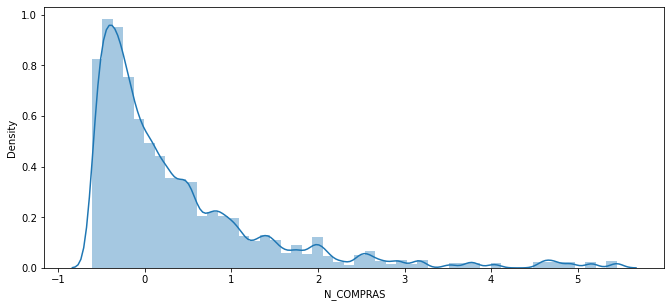

In [115]:
sns.distplot( features2['N_COMPRAS'] );

C:\Users\winicius.faquieri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


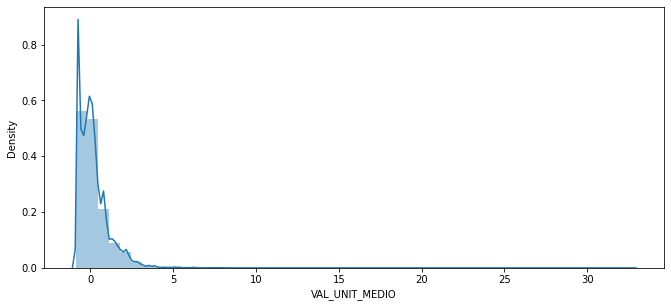

In [117]:
sns.distplot( features2['VAL_UNIT_MEDIO'] );

C:\Users\winicius.faquieri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


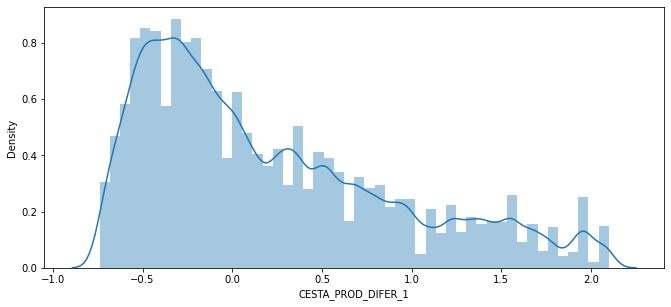

In [118]:
sns.distplot( features2['CESTA_PROD_DIFER_1'] );

C:\Users\winicius.faquieri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


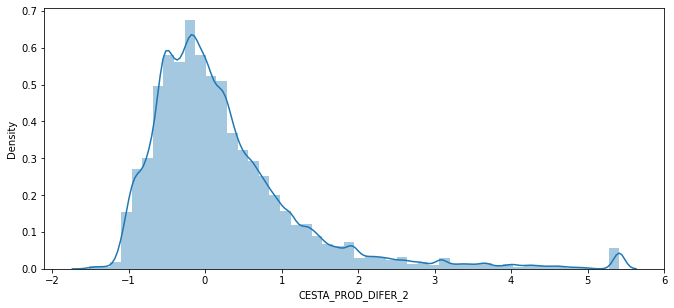

In [119]:
sns.distplot( features2['CESTA_PROD_DIFER_2'] );

In [116]:
num_attributes = features2.select_dtypes( include=['int32', 'float64'] )

# Central Tendency - mean, meadina
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std','skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,N_COMPRAS,-0.612319,5.449275,6.061594,0.355533,0.0,1.048553,2.208819,5.814232
1,VAL_UNIT_MEDIO,-0.877749,32.742253,33.620002,0.189273,0.0,0.909750,2.351248,21.584774
2,VOLUME_COMPRA_MEDIO,-0.803067,239.010116,239.813183,0.889113,0.0,4.248549,13.675391,385.556121
3,VAL_BRUTO_MEDIO,-0.526771,221.235673,221.762444,0.951100,0.0,4.248728,14.399403,387.065874
4,CESTA_PROD_DIFER_1,-0.740000,2.100000,2.840000,0.206980,0.0,0.705216,0.862602,-0.176374
5,CESTA_PROD_DIFER_2,-1.513210,5.411465,6.924674,0.239380,0.0,1.026834,2.160297,6.587130


### BASE NÃO CLASSIFICADA:   2%  (10454 entries) 

In [130]:
# Filtrando os dados 'unclassified'
features2['SEGMENTO'].unique()

array(['I', 'II', 'unclassified', 'III'], dtype=object)

In [11]:
unclassified_df = features2[features2['SEGMENTO'] == 'unclassified']
unclassified_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10454 entries, 28066 to 533201
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NUM_DOC_DEST         10454 non-null  object 
 1   N_COMPRAS            10454 non-null  float64
 2   VAL_UNIT_MEDIO       10454 non-null  float64
 3   VOLUME_COMPRA_MEDIO  10454 non-null  float64
 4   VAL_BRUTO_MEDIO      10454 non-null  float64
 5   CESTA_PROD_DIFER_1   10454 non-null  float64
 6   CESTA_PROD_DIFER_2   10454 non-null  float64
 7   SEGMENTO             10454 non-null  object 
dtypes: float64(6), object(2)
memory usage: 735.0+ KB


In [142]:
# Exportando
unclassified_df.to_pickle('..data/unclassified_df.pickle')

In [12]:
features3 = features2[features2['SEGMENTO'] != 'unclassified']
features3['SEGMENTO'].unique()

array(['I', 'II', 'III'], dtype=object)

In [13]:
# Exportando...
features3.to_pickle('../data/features3.pickle')

### Encoding da variável categórica

In [14]:
# Segmento - Ordinal Encoding
segmento_dict = {'I': 1, 'II': 2, 'III': 3}
features3['SEGMENTO'] = features3['SEGMENTO'].map( segmento_dict );

C:\Users\winicius.faquieri\AppData\Local\Temp/ipykernel_11764/556435851.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features3['SEGMENTO'] = features3['SEGMENTO'].map( segmento_dict );


In [15]:
features3.head()

,NUM_DOC_DEST,N_COMPRAS,VAL_UNIT_MEDIO,VOLUME_COMPRA_MEDIO,VAL_BRUTO_MEDIO,CESTA_PROD_DIFER_1,CESTA_PROD_DIFER_2,SEGMENTO
0,13004510014481,5.449275,0.837084,0.900393,2.051007,1.98,-0.995403,1
1,13004510014481,5.449275,0.837084,0.900393,2.051007,1.98,-0.995403,1
2,13004510014481,5.449275,0.837084,0.900393,2.051007,1.98,-0.995403,1
3,13004510014481,5.449275,0.837084,0.900393,2.051007,1.98,-0.995403,1
4,13004510014481,5.449275,0.837084,0.900393,2.051007,1.98,-0.995403,1


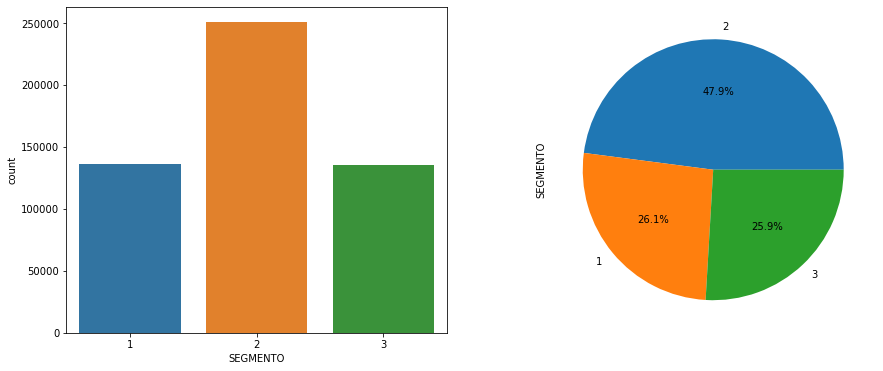

In [139]:
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x='SEGMENTO', data=features3, ax=ax[0])
_ = features3['SEGMENTO'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

### FEATURE SELECTION

> The process of reducing the number of input variables when developing a predictive model. 
It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, 
in some cases, to improve the performance of the model.

FILTER (before training) X WRAPPER (ocorre após o treinamento e utiliza as estatísticas geradas pelo próprio modelo)

- Análise estatítica
- Filter: Correlação, ANOVA.
- Wrapper: Árvores de decisão (entropia/**gini**), redes neurais (dropout/**relevância**)
- Correlação x Relevância
- Multicolinearidade -> Análise Discriminante Linear (LDA) ?


In [24]:
features4 = features3.copy()
features4.head()

,NUM_DOC_DEST,N_COMPRAS,VAL_UNIT_MEDIO,VOLUME_COMPRA_MEDIO,VAL_BRUTO_MEDIO,CESTA_PROD_DIFER_1,CESTA_PROD_DIFER_2,SEGMENTO
0,13004510014481,5.449275,0.837084,0.900393,2.051007,1.98,-0.995403,1
1,13004510014481,5.449275,0.837084,0.900393,2.051007,1.98,-0.995403,1
2,13004510014481,5.449275,0.837084,0.900393,2.051007,1.98,-0.995403,1
3,13004510014481,5.449275,0.837084,0.900393,2.051007,1.98,-0.995403,1
4,13004510014481,5.449275,0.837084,0.900393,2.051007,1.98,-0.995403,1


In [17]:
# Exportando...
features4.to_pickle('../data/features4.pickle')

### Dividindo os dados em conjuntos de treinamento, teste e validação

#### Setup:
    - Full data 100% (1000) 
    - test      20%  (200) -> Generalization!
    - training  80%  (800, sendo 80% (640) train + 20% (160) validation -> Aprendizado!

In [55]:
features4 = pd.read_pickle('../data/features4.pickle')

# Alterando as variáveis para o formato esperado pelo modelo:
features4['N_COMPRAS'] = features4['N_COMPRAS'].astype('float32')
features4['VAL_UNIT_MEDIO'] = features4['VAL_UNIT_MEDIO'].astype('float32')
features4['VOLUME_COMPRA_MEDIO'] = features4['VOLUME_COMPRA_MEDIO'].astype('float32')
features4['VAL_BRUTO_MEDIO'] = features4['VAL_BRUTO_MEDIO'].astype('float32')
features4['CESTA_PROD_DIFER_1'] = features4['CESTA_PROD_DIFER_1'].astype('float32')
features4['CESTA_PROD_DIFER_2'] = features4['CESTA_PROD_DIFER_2'].astype('float32')
features4['SEGMENTO'] = features4['SEGMENTO'].astype('float32')


In [60]:
X = features4.drop(['NUM_DOC_DEST','SEGMENTO'], axis=1)

y = features4.loc[:, 'SEGMENTO']

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y

# # # split training into train and test datset
# X_train, X_test, y_train, y_test = ms.train_test_split(X, dummy_y, test_size=0.2, random_state=42)

# print( X_train.shape, y_train.shape, X_test.shape, y_test.shape )

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [29]:
# make the second split to create the final training set and the validation set:
X_train, X_val, y_train, y_val = ms.train_test_split(X_train, y_train, test_size=0.2)

# MLP Training

In [ ]:
# ==================== 1ª Epoca =======================
# foward: dados * pesos -> função de ativação -> predito
# real - predito = erro
# backpropagation: erro -> derivadas parciais -> update pesos

# ==================== 2ª Epoca =======================
# foward: dados * pesos -> função de ativação -> predito
# real - predito = erro
# backpropagation: erro -> derivadas parciais -> update pesos

# Até os pesos convergirem...

In [61]:
# define baseline model:

def baseline_model():
    model = Sequential()

    # Add the first hidden layer
    model.add(Dense(32, activation='relu', input_dim=6))

    # Add the second hidden layer
    model.add(Dense(16, activation='relu'))

    # Add the output layer - Note que o número total de neurons na output layer é o total de classe - 1
    model.add(Dense(3, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [ ]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

C:\Users\winicius.faquieri\AppData\Local\Temp/ipykernel_14592/1842752508.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)


In [45]:
# Train the model for 200 epochs
model.fit(X_train, y_train, epochs=200)

Epoch 1/200


ValueError: in user code:

    File "C:\Users\winicius.faquieri\Anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\winicius.faquieri\Anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\winicius.faquieri\Anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\winicius.faquieri\Anaconda3\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\winicius.faquieri\Anaconda3\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "C:\Users\winicius.faquieri\Anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\winicius.faquieri\Anaconda3\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\winicius.faquieri\Anaconda3\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\winicius.faquieri\Anaconda3\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\winicius.faquieri\Anaconda3\lib\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


In [ ]:
# split training into train and test datset
x_train, y_train, x_val, y_val = ms.train_test_split( X, y, test_size = 0.2 )

# Multi-Layer Perceptron
model = Sequential()

# Model definition ( layers, neurons )
model.add( Dense(2, input_dim = x_train.shape[1], activation = 'relu' ) ) # input layer + hidden layer

# Note que o número total de neurons na output layer é o total de classe - 1
model.add( Dense(2, activation = 'sigmoid' ) ) # output layer

# Model Compile ( loss, optimizer, metrics )
#SGD - Gradient Descent with Momentum
opt = SGD( lr = 0.01, momentum =  0.8 )
model.compile( loss = 'mean_squared_error', metrics=['accuray'] )

# Model Training ( train, test, epocas )
history = model.fit( x_train, y_train, validation_data = (x_val, y_val), epochs = 4000, verbose = 1 )

# Model Accuracy
_, acc_train = model.evaluate( x_train, y_train, verbose = 0)
_, acc_val = model.evaluate( x_val, y_val, verbose = 0)

# Learning Curve